In [18]:
from __future__ import print_function
import tifffile
import cv2
import numpy as np


MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [19]:
def alignImages(im1, im2):

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
  
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
#   cv2.imwrite("matches.jpg", imMatches)
  
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  
  return im1Reg, h

Reading reference image :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture19_03_32.1.tif
<class 'numpy.ndarray'>
(1478, 2010)


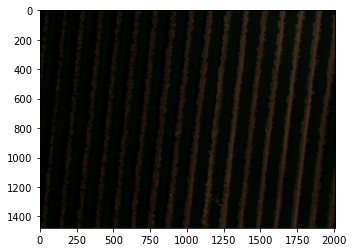

In [20]:
import os, glob, gdal
# put all images in the same folder (reflectance panel and the rest)
path_inputs = (r'C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected')   
path_outputs = (r'C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET')

# Read reference image
refFilename = os.path.join(path_inputs,'Capture19_03_32.1.tif')
print("Reading reference image : ", refFilename)

imReference=tifffile.imread(refFilename)

b= imReference[0, :,:]
g= imReference[1, :,:]
r= imReference[2, :,:]

imReference=np.dstack((r,g,b))
imReference = (imReference/256).astype('uint8')
print(type(imReference))

# imReference = np.rot90(imReference) 
# print((imReference.shape))

im1Gray = cv2.cvtColor(imReference, cv2.COLOR_BGR2GRAY)
print((im1Gray.shape))

import matplotlib.pyplot as plt
plt.imshow(imReference)

In [21]:
files = glob.glob(path_inputs+'/*.tif')

for file in files:

    # Read image to be aligned
    # imFilename = "Capture19_03_35.1.jpg"
    print("Reading image to align : ", file);  
#     im = cv2.imread(file)#, cv2.IMREAD_COLOR)
#     im = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE) 
    
    im=tifffile.imread(file)
    
    b= im[0, :,:]
    g= im[1, :,:]
    r= im[2, :,:]

    im=np.dstack((r,g,b))
    im = (im/256).astype('uint8')

#     im = np.rot90(im) 
    filename = os.path.split(file)

    print("Aligning images ...")
    # Registered image will be resotred in imReg. 
    # The estimated homography will be stored in h. 
    imReg, h = alignImages(im, imReference)

    # Write aligned image to disk. 
    outFilename = filename[-1]
    print("Saving aligned image : ", outFilename); 
    cv2.imwrite(os.path.join(path_outputs,outFilename), imReg)

    # Print estimated homography
#     print("Estimated homography : \n",  h)
  

Reading image to align :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture18_45_53.1.tif
Aligning images ...
Saving aligned image :  Capture18_45_53.1.tif
Reading image to align :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture18_45_56.1.tif
Aligning images ...
Saving aligned image :  Capture18_45_56.1.tif
Reading image to align :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture18_45_57.1.tif
Aligning images ...
Saving aligned image :  Capture18_45_57.1.tif
Reading image to align :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture18_45_58.1.tif
Aligning images ...
Saving aligned image :  Capture18_45_58.1.tif
Reading image to align :  C:\Users\Alfonso\Desktop\20200727_1150AM_Matrice_Micasense_IRT_Tower1\0000SET\stacks_selected\Capture18_45_59.1.tif
Aligning images ...
Saving

KeyboardInterrupt: 